In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH="../Singapore_bus"
dirs=os.listdir(BUS_PATH)
Bus_FileName_DirList=dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

In [3]:
weekday = [15,16,17,18,19,20,21]

In [4]:
data_day = pd.read_csv(os.path.join(BUS_PATH,Bus_FileName_DirList[9]))

In [5]:
import pandas as pd

# 生成日期时间索引，每天只取5:30到23:30
index_16th = pd.date_range(start='2017-01-16 05:30', end='2017-01-16 23:30', freq='15T')
index_16th_data = pd.DataFrame(index=index_16th, columns=['num'], data=0)

index_17th = pd.date_range(start='2017-01-17 05:30', end='2017-01-17 23:30', freq='15T')
index_17th_data = pd.DataFrame(index=index_17th, columns=['num'], data=0)

index_18th = pd.date_range(start='2017-01-18 05:30', end='2017-01-18 23:30', freq='15T')
index_18th_data = pd.DataFrame(index=index_18th, columns=['num'], data=0)

index_19th = pd.date_range(start='2017-01-19 05:30', end='2017-01-19 23:30', freq='15T')
index_19th_data = pd.DataFrame(index=index_19th, columns=['num'], data=0)

index_20th = pd.date_range(start='2017-01-20 05:30', end='2017-01-20 23:30', freq='15T')
index_20th_data = pd.DataFrame(index=index_20th, columns=['num'], data=0)

index_21th = pd.date_range(start='2017-01-21 05:30', end='2017-01-21 23:30', freq='15T')
index_21th_data = pd.DataFrame(index=index_21th, columns=['num'], data=0)

index_22th = pd.date_range(start='2017-01-22 05:30', end='2017-01-22 23:30', freq='15T')
index_22th_data = pd.DataFrame(index=index_22th, columns=['num'], data=0)


# 合并索引
merged_index = index_16th.union(index_17th).union(index_18th).union(index_19th).union(index_20th).union(index_21th).union(index_22th)
# 打印结果

index_data = [index_16th_data,index_17th_data,index_18th_data,index_19th_data,index_20th_data,index_21th_data,index_22th_data,]
print(merged_index)


DatetimeIndex(['2017-01-16 05:30:00', '2017-01-16 05:45:00',
               '2017-01-16 06:00:00', '2017-01-16 06:15:00',
               '2017-01-16 06:30:00', '2017-01-16 06:45:00',
               '2017-01-16 07:00:00', '2017-01-16 07:15:00',
               '2017-01-16 07:30:00', '2017-01-16 07:45:00',
               ...
               '2017-01-22 21:15:00', '2017-01-22 21:30:00',
               '2017-01-22 21:45:00', '2017-01-22 22:00:00',
               '2017-01-22 22:15:00', '2017-01-22 22:30:00',
               '2017-01-22 22:45:00', '2017-01-22 23:00:00',
               '2017-01-22 23:15:00', '2017-01-22 23:30:00'],
              dtype='datetime64[ns]', length=511, freq=None)


In [6]:
data_day = pd.read_csv(os.path.join(BUS_PATH,Bus_FileName_DirList[15]))
data = data_day.loc[:, ['Bus_Service_Number', 'Boarding_stop_stn','Ride_start_date','Ride_start_time']]

data = data[(data.Ride_start_time>="05:30:00")&(data.Ride_start_time<"23:45:00")]

data_temp = data.copy()
data_temp['a']=' '
data_temp.Ride_start_time=pd.to_datetime(data_temp.Ride_start_date+data_temp.a+data_temp.Ride_start_time)
data_temp = data_temp.sort_values('Ride_start_time')
data_temp.set_index('Ride_start_time', inplace=True)

data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '113']
data_server_1.loc[:, 'num'] = 1
result_df = data_server_1.resample('15T').count()
result_all = index_data[0].add(result_df,fill_value=0)

/tmp/ipykernel_2616/1217635557.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1


In [7]:
server1 = '913'
server2 = '185'
station1 = 44009
station2 = 12101

server_1 = []
server_2 = []
station_1 = []
station_2 = []

for day,index in zip(weekday,index_data):
    data_day = pd.read_csv(os.path.join(BUS_PATH,Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number', 'Boarding_stop_stn','Ride_start_date','Ride_start_time']]

    data = data[(data.Ride_start_time>="05:30:00")&(data.Ride_start_time<"23:30:00")]

    data_temp = data.copy()

    data_temp = data.copy()
    data_temp['a']=' '
    data_temp.Ride_start_time=pd.to_datetime(data_temp.Ride_start_date+data_temp.a+data_temp.Ride_start_time)
    data_temp = data_temp.sort_values('Ride_start_time')
    data_temp.set_index('Ride_start_time', inplace=True)

    data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '113']
    data_server_1.loc[:, 'num'] = 1
    result_df = data_server_1.resample('15T').count()
    result_all = index.add(result_df,fill_value=0)
    
    server_1 += result_all['num'].to_list()

    data_server_2 = data_temp.loc[data_temp['Bus_Service_Number'] == '185']
    data_server_2.loc[:, 'num'] = 1
    result_df = data_server_2.resample('15T').count()
    result_all = index.add(result_df,fill_value=0)
    
    server_2 += result_all['num'].to_list()

    data_station_1 = data_temp.loc[data_temp['Boarding_stop_stn'] == 44009]
    data_station_1.loc[:, 'num'] = 1
    result_df = data_station_1.resample('15T').count().fillna(0)
    result_all = index.add(result_df,fill_value=0)

    station_1 += result_all['num'].to_list()

    data_station_2 = data_temp.loc[data_temp['Boarding_stop_stn'] == 17179]
    data_station_2.loc[:, 'num'] = 1
    result_df = data_station_2.resample('15T').count().fillna(0)
    result_all = index.add(result_df,fill_value=0)

    station_2 += result_all['num'].to_list()
    
    print(day)

/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

15


/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

16


/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

17


/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

18


/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

19


/tmp/ipykernel_2616/2408151380.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_day = pd.read_csv(os.path.join(BUS_PATH,Bus_FileName_DirList[day]))
/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A va

20


/tmp/ipykernel_2616/2408151380.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1


21


/tmp/ipykernel_2616/2408151380.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_2.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_station_1.loc[:, 'num'] = 1
/tmp/ipykernel_2616/2408151380.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [8]:
len(server_1)

511

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

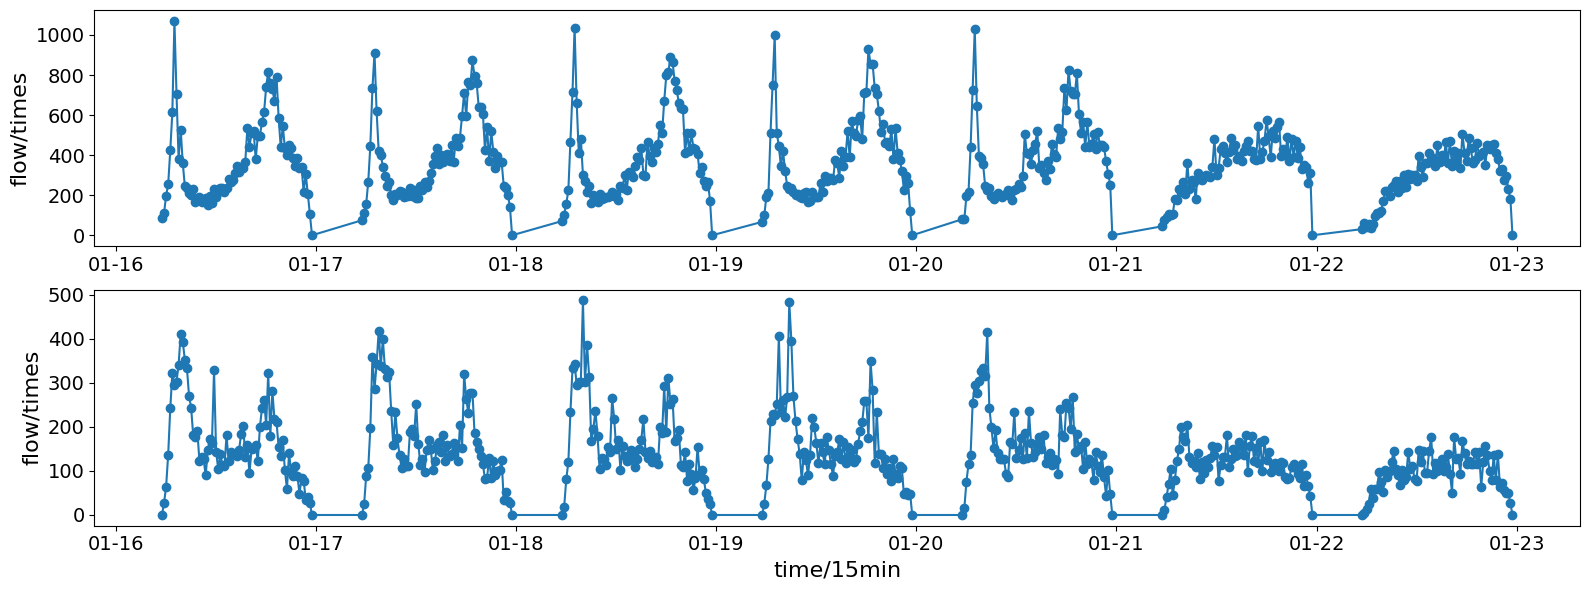

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['xtick.labelsize'] = 14          # X轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14

fig = plt.figure(figsize=(16, 6))

dates = merged_index
data = [server_1,server_2,station_1,station_2]
#==================route flow==================
# plt.subplot(2, 1, 1)
# plt.plot(dates, data[0], marker='o', linestyle='-')
# # plt.text(dates[-1], min(data[0]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# # 设置日期格式
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# # plt.text(0.92, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)
# # plt.ylabel('客流量/次',fontsize=16)
# plt.ylabel('flow/times',fontsize=16)
# plt.subplot(2, 1, 2)
# plt.plot(dates, data[1], marker='o', linestyle='-')
# # plt.text(dates[-1], min(data[1]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# # 设置日期格式
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# # plt.xlabel('时间/15min',fontsize=16)
# # plt.ylabel('客流量/次',fontsize=16)
# plt.xlabel('time/15min',fontsize=16)
# plt.ylabel('flow/times',fontsize=16)
# # plt.text(0.95, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)

#==================stop flow==================
plt.subplot(2, 1, 1)
plt.plot(dates, data[2], marker='o', linestyle='-')
# plt.text(dates[-1], min(data[2]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# 设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# plt.text(0.92, -0.3, '2017年', fontsize=14, transform=plt.gca().transAxes)
# plt.ylabel('客流量/次',fontsize=16)
plt.ylabel('flow/times',fontsize=16)
plt.subplot(2, 1, 2)
plt.plot(dates, data[3], marker='o', linestyle='-')
# plt.text(dates[-1], min(data[3]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# 设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# plt.text(0.95, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)

# plt.xlabel('时间/15min',fontsize=16)
# plt.ylabel('客流量/次',fontsize=16)
plt.xlabel('time/15min',fontsize=16)
plt.ylabel('flow/times',fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('./站点43131_44009_15min客流统计图_new.svg',bbox_inches='tight')
# fig.savefig('./线路113_185_15min客流统计图_new.svg',bbox_inches='tight')



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

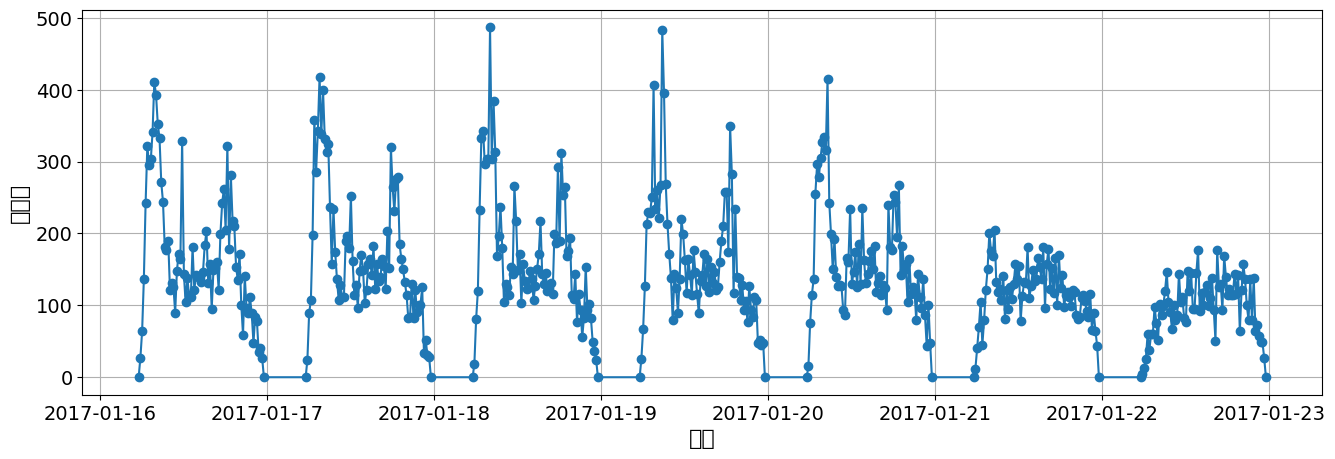

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
fig = plt.figure(figsize=(16, 5))

y_data = station_2

x_data = pd.date_range(start='2017-01-16', end='2017-01-22 23:45:00', freq='15T')

plt.plot(merged_index, y_data, marker='o')
# plt.title('每隔15分钟的客流量统计')
# plt.xticks(result_df.index[::4]) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('时间',fontsize=16)
plt.ylabel('客流量',fontsize=16)
plt.grid(True)
plt.show()

In [11]:

statistic_list = []
statistic_data = []
for day in weekday:
    data_day = pd.read_csv(os.path.join(BUS_PATH,Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number', 'Boarding_stop_stn','Ride_start_date','Ride_start_time','Ride_end_date','Ride_end_time']]

    data = data[(data.Ride_start_date>="05:30:00")&(data.Ride_start_time<"23:45:00")]
    data['a']=' '
    data.Ride_start_time=pd.to_datetime(data.Ride_start_date+data.a+data.Ride_start_time)
    data.Ride_end_time=pd.to_datetime(data.Ride_end_date+data.a+data.Ride_end_time)

    data_temp = data.copy()

    data_diff = data_temp['Ride_end_time'] - data_temp['Ride_start_time']
    y_data = data_diff.dt.total_seconds()
    y_list = y_data.to_list()
    statistic_list.append(del_less_zero(y_list))

    # statistic_data.append(calculate(result_list))
    print(day)


NameError: name 'del_less_zero' is not defined

In [ ]:
y_list


[1682.0,
 960.0000000000001,
 288.0,
 750.0,
 1611.0,
 523.0,
 1238.0,
 408.0,
 747.0,
 3350.0,
 164.0,
 1386.0,
 311.0,
 372.0,
 362.0,
 367.0,
 151.0,
 945.0000000000001,
 873.0,
 391.0,
 404.0,
 695.0,
 279.0,
 300.0,
 996.0000000000001,
 724.0,
 984.0000000000001,
 485.00000000000006,
 394.0,
 464.00000000000006,
 957.0000000000001,
 497.00000000000006,
 1828.0000000000002,
 986.0000000000001,
 1206.0,
 1234.0,
 435.0,
 359.0,
 290.0,
 650.0,
 1456.0,
 1702.0,
 624.0,
 540.0,
 1450.0,
 683.0,
 1223.0,
 1610.0,
 416.0,
 619.0,
 1672.0,
 204.0,
 407.0,
 1591.0,
 329.0,
 299.0,
 1549.0,
 311.0,
 338.0,
 2399.0,
 1743.0,
 1797.0,
 391.0,
 500.00000000000006,
 537.0,
 175.0,
 375.0,
 965.0000000000001,
 1801.0,
 352.0,
 225.0,
 385.0,
 448.0,
 457.00000000000006,
 354.0,
 412.0,
 780.0,
 658.0,
 988.0000000000001,
 1711.0,
 1161.0,
 411.0,
 314.0,
 390.0,
 338.0,
 909.0,
 728.0,
 647.0,
 1365.0,
 925.0000000000001,
 1466.0,
 406.0,
 1495.0,
 485.00000000000006,
 411.0,
 339.0,
 347.0,
 

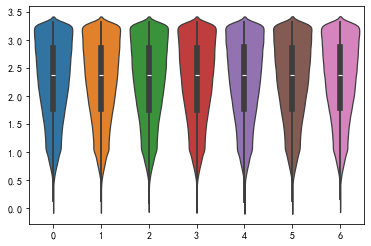

In [ ]:
import seaborn as sns
figure,axes=plt.subplots() #得到画板、轴
sns.violinplot(statistic_list) 
plt.show() #展示

In [ ]:
weekday

[9, 16, 17, 18, 19, 20, 21]

In [ ]:
statistic_list[-1]

[2.7333333333333334,
 2.5166666666666666,
 2.9166666666666665,
 1.5333333333333334,
 1.6833333333333333,
 2.6166666666666667,
 3.1,
 1.0333333333333334,
 3.15,
 2.8833333333333333,
 2.7,
 2.2333333333333334,
 2.9166666666666665,
 2.8833333333333333,
 0.9666666666666668,
 2.5833333333333335,
 3.05,
 2.933333333333333,
 1.8333333333333333,
 2.15,
 2.9,
 3.2333333333333334,
 2.6,
 3.3,
 2.3333333333333335,
 1.2833333333333334,
 1.4666666666666666,
 1.75,
 2.1666666666666665,
 3.1333333333333333,
 2.466666666666667,
 2.0333333333333337,
 0.7666666666666667,
 0.85,
 1.8333333333333333,
 3.283333333333333,
 2.216666666666667,
 0.9333333333333333,
 2.566666666666667,
 1.916666666666667,
 3.0,
 1.0166666666666668,
 3.1,
 1.0333333333333334,
 2.25,
 3.2,
 2.466666666666667,
 2.966666666666667,
 1.15,
 3.316666666666667,
 1.75,
 3.2,
 1.7666666666666666,
 1.6333333333333333,
 0.8666666666666667,
 1.7166666666666666,
 2.283333333333333,
 3.3,
 3.0833333333333335,
 3.183333333333333,
 2.8166666666

In [ ]:
max(statistic_list[-1])

3.316666666666667

In [ ]:
calculate(statistic_list[1])

[2.2756614325012796,
 2.3666666666666667,
 0.7038090632243372,
 0.016666666666666666,
 3.316666666666667,
 1.7666666666666666,
 2.3666666666666667,
 2.8666666666666667,
 3.2]

In [ ]:
# 计算平均值,中位数,标准差,最小值,最大值,第一四分位数,第二四分位数,第三四分位数
import numpy as np
from scipy import stats

def calculate(data):
    # 平均值
    mean_value = np.mean(data)

    # 中位数
    median_value = np.median(data)

    # 标准差
    std_deviation = np.std(data)

    # 最小值和最大值
    min_value = np.min(data)
    max_value = np.max(data)

    # 四分位数
    q1, q2, q3 = np.percentile(data, [25, 50, 75])

    # 众数
    mode_value = stats.mode(data).mode[0]

    return [mean_value,median_value,std_deviation,min_value,max_value,q1, q2, q3,mode_value]


In [ ]:
# 删除小于0的值且将时间转为min
def del_less_zero(data):
    my_list = [x for x in data if (x >= 0) and (x<200)]
    result_list = []
    for x in my_list:
        result_list.append(x / 60)
    return result_list